In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import networkx as nx
import random as RD
import pylab as PL
import numpy as np 
k = 4
%matplotlib inline

In [23]:
#init function for the start of simulation
def init():
    global g,positions,I,S,T,K,Iall,Sall,Tall,Kall,t,posters
    g=nx.read_edgelist('facebook_combined.txt',nodetype=int)
    
    for nd in g.nodes_iter():
        
        
        if RD.random() <= 0.05:
            g.node[nd]['state'] = 1
        else :
            g.node[nd]['state'] = 0
    positions=nx.spring_layout(g)
    I=0
    S=0
    T=0
    K=0
    t=[]
    Iall=[]
    Sall=[]
    Tall=[]
    Kall=[]
    for nd in g.nodes_iter():
        if g.node[nd]['state']==0:
            I=I+1
        if g.node[nd]['state']==1:
            S=S+1
    Iall.append(I)
    Sall.append(S)
    Tall.append(T)
    Kall.append(K)
    t.append(0)
    
    

In [24]:
#init function to assign daily login time and posting order
def dailyinit(day):
    global g,positions,I,S,T,K,Iall,Sall,Tall,Kall,t,posters
    for nd in g.nodes_iter():
        mu, sigma = 23, 4
        c=RD.randint(0,457)
        s = np.random.normal(mu, sigma)
        g.node[nd]['start']=480*day+c
        g.node[nd]['end']=480*day+int(c+s)
        if RD.random() <= 14.00/365:
            g.node[nd]['poster'] = 1
            g.node[nd]['post_time'] = 480*day+RD.randint(c,int(c+s))
        else :
            g.node[nd]['poster'] = 0
            g.node[nd]['post_time'] = -1
    a=sorted(g.nodes(data=True), key=lambda x: x[1]['post_time'])
    posters=[]
    for row in a:
        if (row[1]['post_time']>=0):
            posters.append(row[0])
            print(row[0],row[1]['post_time'])

In [25]:
#For plotting with Pycx
def draw():
    PL.cla()
    nx.draw(g, with_labels = False, pos = positions,
            node_color = [g.node[n]['state'] for n in g.nodes_iter()],
            vmin = 0, vmax = k - 1, cmap = PL.cm.jet)

In [26]:
def update(poster):
    global g, t,I,S,T,K,Iall,Sall,Tall,Kall
    prob=np.array([[-1,0.8,-1,-1],[-1,0.01,0.02,-1],[-1,-1,-1,-1],[-1,0.01,-1,-1]]) #probability table
    prob=np.transpose(prob)
    nd= poster #using poster as current node
    
    for a in range(1):
        
            
        for nd2 in g.neighbors(nd): #all neighbors of poster
            #print('--nd2='+str(nd2),g.node[nd2]['end'])
            if g.node[nd2]['end']>=g.node[nd]['post_time']: #neighbors which logout after posting time i.e those who can read the post
                #print('nd2='+str(nd2),g.node[nd2]['end'])
                
                i=g.node[nd]['state']
                j=g.node[nd2]['state']
                if prob[i,j]<0 : #Means this interaction is not important
                    print("no")
                    break
                else:
                    print("yes")
                    if j==0:  # if reader is ignorant
                        
                        if RD.random()<=0.8:
                            g.node[nd]['state']=1                            
                            S=S+1
                            I=I-1
                        else:
                            g.node[nd]['state']=2
                            I=I-1
                            T=T+1
                    if j==1:
                        
                        if RD.random()<=1/22*480:  #forgetting factor
                            g.node[nd]['state']=3
                            S=S-1
                            K=K+1
                            break
                        if RD.random()<=prob[i,j]:  #If reader is a spreader, poster can be spreader or Stifler
                            g.node[nd]['state']=2
                            S=S-1
                            T=T+1
                    if j==3:  #If reader is knowledgable
                        
                        if RD.random()<=prob[i,j]:
                            K=K-1
                            g.node[nd]['state']=2
                            T=T+1
                    
                    t.append(g.node[nd]['post_time'])
                    Iall.append(I)
                    Sall.append(S)
                    Tall.append(T)
                    Kall.append(K)

                    
            else:
                break

In [27]:
#Simulation
init()
for day in range(0,22):
    dailyinit(day)
    for poster in posters:
        print(poster,g.node[poster]['post_time'])
        update(poster)
    


(364, 6)
(1865, 10)
(3702, 11)
(3030, 18)
(1375, 25)
(3249, 27)
(3577, 33)
(1640, 36)
(3825, 41)
(801, 44)
(2604, 46)
(3981, 47)
(373, 50)
(1318, 50)
(3544, 54)
(619, 58)
(641, 61)
(2904, 64)
(1368, 65)
(2460, 72)
(2064, 75)
(2946, 75)
(3590, 75)
(2166, 82)
(2116, 84)
(3768, 85)
(1220, 86)
(987, 87)
(2400, 87)
(3513, 98)
(1359, 105)
(3540, 105)
(1631, 108)
(859, 111)
(242, 112)
(2318, 120)
(1054, 130)
(1079, 133)
(3507, 135)
(1519, 136)
(2708, 136)
(98, 146)
(1816, 146)
(3486, 148)
(3659, 151)
(870, 152)
(731, 154)
(421, 170)
(1855, 177)
(3292, 179)
(2011, 181)
(886, 186)
(3065, 187)
(13, 190)
(1802, 192)
(2480, 192)
(64, 195)
(102, 199)
(2773, 199)
(808, 201)
(2807, 204)
(268, 209)
(3601, 209)
(2675, 210)
(3688, 210)
(2601, 213)
(819, 218)
(1624, 221)
(2294, 222)
(551, 224)
(1987, 226)
(1740, 228)
(391, 232)
(432, 233)
(2026, 234)
(512, 240)
(449, 242)
(23, 251)
(2678, 253)
(1837, 255)
(3644, 255)
(695, 258)
(428, 261)
(3354, 261)
(3006, 263)
(961, 267)
(2208, 270)
(3153, 271)
(3757, 

(2485, 1447)
(3359, 1449)
(1713, 1455)
(3010, 1458)
(631, 1463)
(169, 1464)
(31, 1466)
(2458, 1466)
(3619, 1467)
(3091, 1468)
(1638, 1471)
(3604, 1473)
(3793, 1473)
(1067, 1476)
(2253, 1477)
(1981, 1479)
(2799, 1479)
(3921, 1481)
(901, 1486)
(1163, 1489)
(3320, 1490)
(668, 1492)
(963, 1495)
(1297, 1509)
(403, 1511)
(1424, 1518)
(2334, 1518)
(3310, 1518)
(536, 1520)
(1202, 1523)
(1714, 1532)
(3813, 1536)
(3999, 1543)
(1940, 1548)
(1050, 1564)
(3708, 1564)
(3705, 1566)
(365, 1567)
(140, 1575)
(2178, 1576)
(2577, 1579)
(3846, 1579)
(211, 1580)
(2978, 1581)
(3902, 1583)
(2052, 1588)
(3932, 1591)
(3199, 1592)
(1291, 1595)
(3852, 1596)
(2222, 1600)
(3833, 1602)
(1236, 1603)
(793, 1604)
(1197, 1610)
(3863, 1612)
(2287, 1613)
(164, 1614)
(156, 1616)
(596, 1618)
(2444, 1618)
(1504, 1632)
(143, 1634)
(1619, 1637)
(2815, 1637)
(3109, 1637)
(3030, 1643)
(1887, 1644)
(1479, 1645)
(3215, 1648)
(349, 1652)
(1654, 1658)
(2802, 1659)
(2018, 1661)
(1138, 1679)
(2488, 1681)
(1937, 1682)
(2361, 1686)
(111

(3509, 2409)
no
(1461, 2420)
no
(3870, 2422)
yes
yes
yes
yes
yes
no
(3230, 2429)
no
(4018, 2435)
no
(3838, 2439)
no
(3680, 2442)
no
(1236, 2445)
yes
no
(81, 2447)
no
(2459, 2451)
no
(1069, 2452)
no
(399, 2453)
no
(2598, 2456)
no
(3834, 2458)
no
(538, 2466)
no
(997, 2467)
no
(3734, 2472)
no
(3245, 2473)
no
(2472, 2481)
no
(1993, 2483)
no
(3424, 2486)
no
(777, 2487)
no
(3094, 2489)
yes
no
(3528, 2490)
no
(1244, 2491)
no
(1879, 2496)
no
(2068, 2498)
no
(3330, 2502)
no
(361, 2503)
yes
yes
(3469, 2504)
no
(3969, 2505)
no
(21, 2510)
no
(1676, 2512)
yes
yes
yes
yes
yes
(3298, 2512)
no
(1895, 2513)
no
(3177, 2517)
(3431, 2528)
no
(543, 2531)
no
(3056, 2534)
(1387, 2542)
yes
yes
yes
(2075, 2544)
no
(3313, 2547)
no
(611, 2550)
(1816, 2550)
no
(3370, 2551)
no
(3115, 2553)
no
(2176, 2569)
no
(817, 2573)
no
(1827, 2573)
no
(207, 2576)
no
(2841, 2577)
no
(1095, 2578)
no
(2545, 2579)
no
(1818, 2583)
no
(1688, 2587)
no
(2645, 2589)
no
(1983, 2593)
(3937, 2596)
(820, 2601)
no
(2553, 2602)
no
(706, 2604

(1284, 4634)
(1822, 4637)
(1949, 4643)
no
(3259, 4647)
no
(3495, 4647)
(724, 4650)
no
(155, 4657)
(2647, 4659)
yes
yes
yes
(1890, 4660)
no
(1233, 4668)
(2487, 4669)
(2889, 4669)
(1117, 4673)
(3270, 4673)
(1972, 4677)
no
(2148, 4683)
(3083, 4685)
(2578, 4689)
no
(3201, 4694)
no
(2198, 4696)
no
(2475, 4696)
(55, 4698)
(3310, 4701)
(1706, 4703)
(968, 4706)
(1374, 4706)
(2687, 4710)
(3535, 4710)
yes
(2345, 4712)
no
(3660, 4716)
(1119, 4717)
(1248, 4717)
(1341, 4717)
(459, 4721)
no
(2569, 4721)
(225, 4729)
(1124, 4733)
(2828, 4735)
(3483, 4737)
(3217, 4738)
(1941, 4740)
(2467, 4742)
(19, 4744)
(2321, 4744)
(593, 4755)
(701, 4755)
no
(2493, 4755)
(1253, 4756)
no
(1208, 4762)
(1298, 4762)
(717, 4763)
(3706, 4763)
(2503, 4768)
(1435, 4769)
(2388, 4771)
(2412, 4777)
(3449, 4781)
(865, 4783)
(426, 4814)
(3905, 4814)
(3911, 4819)
(1121, 4822)
(861, 4823)
(2983, 4824)
(3361, 4830)
(1080, 4833)
(2634, 4833)
(3538, 4835)
(3025, 4840)
(667, 4841)
(895, 4843)
(2813, 4843)
(1220, 4850)
(2334, 4850)
(29

(1143, 5989)
no
(4028, 5992)
(2013, 5993)
(2782, 5993)
(2213, 6003)
no
(3855, 6006)
(614, 6009)
(3000, 6010)
(2965, 6013)
(2026, 6025)
(1235, 6026)
no
(3599, 6028)
no
(3909, 6034)
(19, 6035)
no
(1580, 6049)
no
(1689, 6052)
no
(1459, 6053)
(2389, 6072)
no
(2676, 6077)
no
(712, 6079)
(3323, 6080)
(393, 6081)
(163, 6083)
no
(1211, 6085)
(1806, 6086)
(2801, 6086)
(2275, 6088)
no
(3645, 6088)
(3949, 6090)
(2017, 6093)
(191, 6094)
no
(1955, 6098)
(2870, 6099)
(348, 6105)
(441, 6105)
(3234, 6111)
(2810, 6112)
no
(1241, 6114)
(3018, 6122)
(2197, 6123)
(892, 6124)
(1427, 6129)
(2997, 6129)
(2974, 6137)
no
(2446, 6141)
no
(2502, 6149)
(1184, 6154)
(1255, 6155)
no
(20, 6164)
(2183, 6173)
(868, 6177)
no
(760, 6179)
no
(2169, 6180)
(2367, 6182)
(3080, 6182)
(1056, 6189)
(3423, 6197)
(1683, 6221)
(3274, 6222)
(240, 6223)
(1833, 6223)
(3343, 6252)
(3692, 6254)
(3653, 6257)
(3817, 6270)
(2831, 6273)
(366, 6278)
(2941, 6278)
(91, 6282)
(2324, 6287)
(464, 6288)
(2956, 6294)
(1014, 6298)
(1997, 6298)
(30

(3277, 7211)
(387, 7218)
(2755, 7222)
(68, 7223)
(963, 7223)
(1715, 7223)
(1313, 7224)
(2611, 7227)
(1830, 7229)
(197, 7232)
(367, 7235)
(436, 7235)
(2963, 7235)
(3590, 7235)
(2160, 7240)
(3820, 7242)
(202, 7244)
(2797, 7244)
(283, 7246)
(3261, 7247)
(159, 7248)
(1679, 7258)
(3642, 7267)
(1109, 7268)
(2526, 7270)
(1607, 7275)
(2919, 7278)
(2039, 7280)
(19, 7284)
(2187, 7285)
(2389, 7291)
(994, 7292)
(3172, 7292)
(661, 7295)
(2158, 7297)
(3988, 7299)
(510, 7301)
(745, 7301)
(617, 7304)
(1833, 7306)
(3104, 7312)
(2536, 7316)
(1766, 7318)
(446, 7323)
(2369, 7324)
(3089, 7332)
(2637, 7335)
(1177, 7355)
(97, 7356)
(530, 7365)
(69, 7371)
(2580, 7371)
(497, 7375)
(88, 7376)
(2559, 7384)
(244, 7386)
(444, 7386)
(425, 7387)
(3084, 7387)
(178, 7390)
(2222, 7390)
(755, 7393)
(3011, 7397)
(2833, 7398)
(2619, 7402)
(3386, 7404)
(692, 7408)
(1947, 7410)
(2566, 7412)
(989, 7413)
(1939, 7418)
(2373, 7429)
(2412, 7429)
(2668, 7432)
(2248, 7435)
(3003, 7436)
(2767, 7443)
(3019, 7445)
(401, 7446)
(2638, 

(3132, 8644)
(2501, 8653)
(1366, 8655)
(1901, 8657)
(3329, 8657)
(386, 8658)
(1799, 8663)
(2568, 8663)
(3622, 8663)
(1737, 8664)
(3913, 8664)
(233, 8668)
(1565, 8669)
(1916, 8669)
(453, 8674)
(2392, 8674)
(3180, 8679)
(2209, 8684)
(2625, 8696)
(150, 8699)
(1046, 8705)
(3070, 8706)
(1627, 8707)
(553, 8709)
(926, 8709)
(1802, 8710)
(1004, 8713)
(1242, 8722)
(2962, 8722)
(466, 8728)
(1843, 8729)
(2353, 8739)
(2552, 8739)
(2373, 8741)
(389, 8742)
(1769, 8744)
(1225, 8745)
(2453, 8745)
(1064, 8747)
(3416, 8747)
(2478, 8748)
(2368, 8754)
(179, 8756)
(421, 8760)
(2329, 8767)
(1132, 8768)
(3576, 8771)
(2894, 8773)
(3480, 8778)
(1385, 8779)
(2011, 8785)
(3544, 8787)
(3369, 8790)
(1176, 8791)
(2636, 8791)
(2145, 8793)
(3912, 8794)
(220, 8797)
(2364, 8799)
(1398, 8805)
(3546, 8805)
(1593, 8807)
(1909, 8809)
(2115, 8810)
(1292, 8813)
(2838, 8813)
(1876, 8814)
(2192, 8814)
(2207, 8822)
(236, 8824)
(1777, 8827)
(1708, 8829)
(3552, 8829)
(1707, 8830)
(1919, 8835)
(491, 8840)
(1249, 8840)
(3045, 8844)

(3739, 10088)
(600, 10096)
(2088, 10096)
(476, 10101)
(2844, 10104)
(2990, 10106)
(3066, 10106)
(1036, 10107)
(18, 10114)
(887, 10115)
(2824, 10119)
(2234, 10121)
(1410, 10125)
(85, 10126)
(1204, 10128)
(977, 10130)
(510, 10139)
(2523, 10141)
(3889, 10142)
(2373, 10145)
(2258, 10147)
(2543, 10147)
(3663, 10148)
(634, 10152)
(1984, 10152)
(3928, 10155)
(1077, 10158)
(920, 10159)
(1425, 10161)
(3415, 10161)
(2983, 10169)
(1004, 10173)
(3454, 10173)
(1435, 10174)
(2590, 10176)
(434, 10180)
(331, 10181)
(1509, 10181)
(112, 10188)
(393, 10188)
(1229, 10188)
(1259, 10188)
(1824, 10188)
(2553, 10188)
(2513, 10189)
(1993, 10190)
(292, 10199)
(92, 10201)
(2114, 10203)
(1937, 10205)
(2115, 10205)
(1130, 10206)
(2471, 10207)
(528, 10215)
(1117, 10222)
(3049, 10224)
(1284, 10225)
(1849, 10228)
(3390, 10234)
(247, 10236)
(1765, 10237)
(1784, 10239)
(809, 10245)
(3736, 10246)
(1553, 10247)
(290, 10252)
(1710, 10252)
(3611, 10256)
(1267, 10261)
(1276, 10264)
(1569, 10265)
(1356, 10266)
(2448, 10271)


In [20]:
Iall #Values of ignorants

[3844,
 3843,
 3842,
 3842,
 3841,
 3840,
 3839,
 3838,
 3837,
 3836,
 3835,
 3834,
 3833,
 3832,
 3831,
 3830,
 3829,
 3828,
 3827,
 3826,
 3825,
 3824,
 3823,
 3822,
 3821,
 3820,
 3819,
 3818,
 3817,
 3816,
 3816,
 3815,
 3814,
 3813,
 3812,
 3811,
 3810,
 3809,
 3809,
 3808,
 3808,
 3807,
 3806,
 3806,
 3805,
 3804,
 3804,
 3803,
 3802,
 3801,
 3801,
 3800,
 3800,
 3799,
 3798,
 3797,
 3796,
 3795,
 3794,
 3793,
 3792,
 3792,
 3791,
 3790,
 3789,
 3788,
 3787,
 3786,
 3785,
 3784,
 3783,
 3782,
 3781,
 3780,
 3779,
 3778,
 3778,
 3777,
 3776,
 3775,
 3774,
 3773,
 3772,
 3771,
 3770,
 3769,
 3768,
 3767,
 3766,
 3765,
 3764,
 3763,
 3762,
 3761,
 3760,
 3760,
 3759,
 3758,
 3757,
 3756,
 3756,
 3755,
 3754,
 3753,
 3752,
 3751,
 3750,
 3749,
 3748,
 3747,
 3746,
 3745,
 3744,
 3743,
 3742,
 3741,
 3740,
 3740,
 3739,
 3738,
 3737,
 3736,
 3735,
 3734,
 3733,
 3732,
 3731,
 3730,
 3730,
 3729,
 3728,
 3727,
 3726,
 3725,
 3724,
 3723,
 3723,
 3723,
 3722,
 3721,
 3720,
 3719,
 3718,

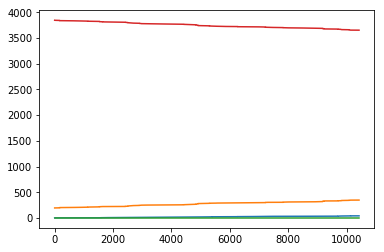

In [28]:
plt.plot(t,Tall) #Stifler
plt.plot(t,Sall) #Spreader
plt.plot(t,Kall) #Knowledgable
plt.plot(t,Iall) #Ignorant